In [54]:
import random
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Problem 1

### Define our functions

In [55]:
# estimating the value of pi

# function to estimate distance
# circle has a radius of 1
# center of circle is 0,0
# so distance of a point to 0,0 is always sqrt(((x-0)**2)+((y-0)**2))
def insidecircle(x,y):
    if x > 1 or y >1:
        raise Exception("must be less than or equal to 1")
    distance = math.sqrt(x**2 + y**2)
    if distance <= 1:
        return 1
    else:
        return 0

def estimatepi(n):
    total_tries = 0
    in_the_circle = 0
    while total_tries < n:
        x = random.random()
        y = random.random()
        is_in_circle = insidecircle(x,y)
        if is_in_circle == 1:
            in_the_circle += 1
        total_tries += 1
    area_of_quarter_circle = (in_the_circle/total_tries)
    pi_estimate = area_of_quarter_circle * 4
    # SEE = ((y - yhat)**2)/n
    see = ((math.pi-pi_estimate)**2)/total_tries
    # ci = yhat +/- 1.96*see (1.96 == 95% of area under a normal curve)
    ci_lower = (pi_estimate-(1.96*see))
    ci_upper = (pi_estimate+(1.96*see))
    return pi_estimate, see, ci_lower, ci_upper


### Part C - increments of 500

We can see that at the lowest sample size of 1000, we're within 0.1 of the true value of $\pi$

In [56]:
biglist = []
for i in range(1000,10000,500):
    smalldict = {}
    a,b,c,d = estimatepi(i)
    smalldict['pi_estimate'] = a
    smalldict['standard_error'] = b
    smalldict['ci_lower_bound'] = c
    smalldict['ci_upper_bound'] = d
    smalldict['sample_size'] = i
    biglist.append(smalldict)

#### Create a DF

In [57]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [58]:
df = pd.DataFrame(biglist)
df['diff_from_pi'] = math.pi - df['pi_estimate']
df

,pi_estimate,standard_error,ci_lower_bound,ci_upper_bound,sample_size,diff_from_pi
0,3.200,0.000,3.200,3.200,1000,-0.058
1,3.192,0.000,3.192,3.192,1500,-0.050
2,3.172,0.000,3.172,3.172,2000,-0.030
3,3.150,0.000,3.150,3.150,2500,-0.009
4,3.099,0.000,3.099,3.099,3000,0.043
5,3.143,0.000,3.143,3.143,3500,-0.001
6,3.100,0.000,3.100,3.100,4000,0.042
7,3.119,0.000,3.119,3.119,4500,0.022
8,3.107,0.000,3.107,3.107,5000,0.034
9,3.107,0.000,3.107,3.107,5500,0.035


### Part D - 500 Runs

The Standard Deviation for our 500 runs is 0.051

The CI lower bound for our 500 runs is 3.135
The CI upper bound for our 500 runs is 3.144
The % of estimates in the CI for our 500 runs is 9.40%

In [59]:
biglist = []
for i in range(0,500):
    smalldict = {}
    a,b,c,d = estimatepi(1000)
    smalldict['pi_estimate'] = a
    smalldict['standard_error'] = b
    smalldict['ci_lower_bound'] = c
    smalldict['ci_upper_bound'] = d
    smalldict['run_number'] = i
    biglist.append(smalldict)

In [60]:
df = pd.DataFrame(biglist)
df['diff_from_pi'] = math.pi - df['pi_estimate']
df

,pi_estimate,standard_error,ci_lower_bound,ci_upper_bound,run_number,diff_from_pi
0,3.164,0.000,3.164,3.164,0,-0.022
1,3.120,0.000,3.120,3.120,1,0.022
2,3.112,0.000,3.112,3.112,2,0.030
3,3.152,0.000,3.152,3.152,3,-0.010
4,3.148,0.000,3.148,3.148,4,-0.006
...,...,...,...,...,...,...
495,3.072,0.000,3.072,3.072,495,0.070
496,3.176,0.000,3.176,3.176,496,-0.034
497,3.192,0.000,3.192,3.192,497,-0.050
498,3.132,0.000,3.132,3.132,498,0.010


<AxesSubplot:ylabel='Frequency'>

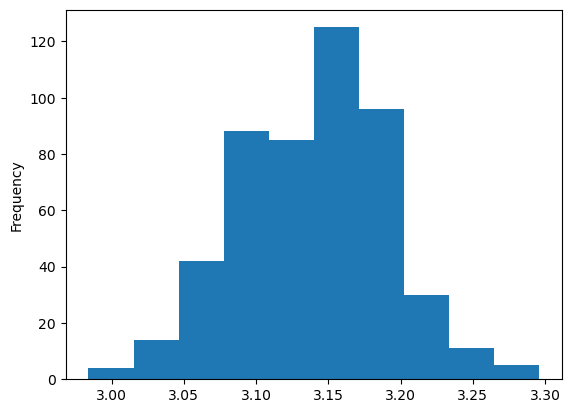

In [61]:
df['pi_estimate'].plot.hist()

In [62]:
stddev = df['pi_estimate'].std()
print(f'The Standard Deviation for our 500 runs is {stddev:.3f}')

The Standard Deviation for our 500 runs is 0.051


In [77]:
lower_ci = df['pi_estimate'].mean() - ((1.96*stddev)/math.sqrt(df.shape[0]))
upper_ci = df['pi_estimate'].mean() + ((1.96*stddev)/math.sqrt(df.shape[0]))

print(f'The CI lower bound for our 500 runs is {lower_ci:.3f}')
print(f'The CI upper bound for our 500 runs is {upper_ci:.3f}')

df['in_confidence_interval'] = df['pi_estimate'].between(lower_ci,upper_ci)

print(f'The % of estimates in the CI for our 500 runs is {df["in_confidence_interval"].value_counts()[1]/df.shape[0]:.2%}')

The CI lower bound for our 500 runs is 3.135
The CI upper bound for our 500 runs is 3.144
The % of estimates in the CI for our 500 runs is 9.40%


## Problem 2

average daily bonus is $11.00


### set up function

In [88]:
bonus_dict = {'a':10,
              'b':15,
              'c':20,
              'd':25
              }

bike_models = ['a','b','c','d']

def bikesim():    
    # initial prob of selling more than 4 bikes
    first = np.random.choice([0,1],p = [.6,.4])
    if first == 0:
        return 0, 0, []
    # now that we passed the first hurdle, how many addtl bikes were sold
    total_bonus = 0
    # additional probs of selling 5-8 bikes
    total_sales_list = [5, 6, 7, 8]
    total_sales = np.random.choice(total_sales_list,p = [.35,.45,.15,.05])
    addtl_bikes_list = []
    for i in range(total_sales-4):
        # calculate total bonus
        bike_sold = np.random.choice(bike_models, p = [.4,.35,.2,.05])
        addtl_bikes_list.append(bike_sold)
        total_bonus += bonus_dict[bike_sold]
    return total_bonus, len(addtl_bikes_list), addtl_bikes_list

### run our function 100000 times

In [93]:
biglist = []
for i in range(100000):
    smalldict = {}
    x, y, z = bikesim()
    smalldict['bonus'] = x
    smalldict['additional_bikes_sold'] = y
    smalldict['list_of_bikes'] = z
    biglist.append(smalldict)

df = pd.DataFrame(biglist)
mean_bonus = df['bonus'].mean()
print(f'average daily bonus is ${mean_bonus:.2f}')

average daily bonus is $11.00


In [94]:
# summary of all sales
df.describe()

,bonus,additional_bikes_sold
count,100000.000,100000.000
mean,11.002,0.759
std,15.959,1.068
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,20.000,2.000
max,90.000,4.000


In [95]:
# look at some sales 
df

,bonus,additional_bikes_sold,list_of_bikes
0,0,0,[]
1,0,0,[]
2,0,0,[]
3,20,2,"[a, a]"
4,15,1,[b]
...,...,...,...
99995,0,0,[]
99996,0,0,[]
99997,0,0,[]
99998,0,0,[]


## Problem 3

avg balance at age 60 over 1000 runs is $921630.62

In [58]:
import random
import pandas as pd
import numpy as np
import math

inv_dict = {
    'a' : {
        "mean_return" :0.0663,
        "std":0.1346},
    'b' :{
        "mean_return" :0.0989,
        "std":0.1528},
    'c' :{
        "mean_return" :0.0855,
        "std":0.1690}
}



class investmentsimulator():
    def __init__(self,name):
        self.name = name
        self.balance_at_end = 0
        self.inv_dict = {
            'a' : {
                "mean_return" :0.0663,
                "std":0.1346},
            'b' :{
                "mean_return" :0.0989,
                "std":0.1528},
            'c' :{
                "mean_return" :0.0855,
                "std":0.1690}
        }
        self.salary = 48000


    def simulate_investments(self):
        biglist = []
        
        # set totals to 0 for start
        total_balance = 0
        a_invest = 0
        b_invest = 0
        c_invest = 0

        # yearly loop
        for i in range(1,37):
            # set base things
            
            yearly_contribution = self.salary * 0.06
            company_yearly_contribution = yearly_contribution * .5
            total_contrib = yearly_contribution + company_yearly_contribution

            # assume year 0 (first year at job) we get no raise and just invest the 6 + 3 percent
            # also assume normal distribution for everything
            # set return rate
            a_return_rate = np.random.normal(inv_dict["a"]['mean_return'], inv_dict["a"]['std'])
            b_return_rate = np.random.normal(inv_dict["b"]['mean_return'], inv_dict["b"]['std'])
            c_return_rate = np.random.normal(inv_dict["c"]['mean_return'], inv_dict["c"]['std'])

            # set investments
            # check this section to see if we do lumps or nah
            a_invest += total_contrib * .50
            b_invest += total_contrib * .25
            c_invest += total_contrib * .25

            # get total growth
            a_return = a_invest * a_return_rate
            b_return = b_invest * b_return_rate
            c_return = c_invest * c_return_rate

            # sum yearly interest growth
            yearly_interest_growth = a_return + b_return + c_return

            # rebalance the portfolio
            total_year_money = a_invest + b_invest + c_invest + yearly_interest_growth
            a_invest = total_year_money * .5
            b_invest = total_year_money * .25
            c_invest = total_year_money * .25


        #yearly raise (end of year raise doesn't affect current year investments)
        if i == 1:
            yearly_raise = 0
        else:
            yearly_raise = self.salary * np.random.normal(.027,.004)
            self.salary += yearly_raise

        smalldict = {}
        smalldict['year'] = i
        smalldict['self.salary'] = self.salary
        smalldict['a_invest'] = a_invest
        smalldict['b_invest'] = b_invest
        smalldict['c_invest'] = c_invest
        smalldict['a_return'] = a_return
        smalldict['b_return'] = b_return
        smalldict['c_return'] = c_return
        smalldict['yearly_raise'] = yearly_raise
        biglist.append(smalldict)

        self.balance_at_end += yearly_interest_growth + a_invest + b_invest + c_invest
        self.df = pd.DataFrame(biglist)




In [48]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [61]:
simus = [investmentsimulator(i) for i in range(1000)]
for simu in simus: 
    simu.simulate_investments()

In [62]:
allbalances = []
for simu in simus:
    allbalances.append(simu.balance_at_end)

print(f'avg balance at age 60 over 1000 runs is ${sum(allbalances)/len(allbalances):.2f}')

avg balance at age 60 over 1000 runs is $921630.62
